# First part


## Preparations

Loading the modules:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

Reading the data into a pandas dataframe and having a first look:

In [101]:
df = pd.read_csv("data/data.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9
0,2.12532,-8.35859,-9.39368,8.56843,8.78855,6.32030,-4.73014,-6.92553,3.68487,-1.20625
1,-10.15949,9.97078,8.04821,-4.82858,-6.30387,-6.97885,-3.21693,0.88861,-0.46591,-3.54025
2,-2.50408,8.77970,3.22451,1.55252,-7.22234,-7.68239,-8.99961,7.72757,3.90849,4.33603
3,-7.33024,-1.95436,-8.70898,8.48457,-4.18574,4.30856,-3.39816,0.54945,0.05314,-7.01513
4,-10.05601,9.74470,6.60193,-5.27618,-6.28668,-7.61490,-2.91889,0.00137,-2.91768,-4.60353


Normalizing the data:

In [102]:
df = (df - df.mean()) / df.std()
df

,0,1,2,3,4,5,6,7,8,9
0,0.304724,-1.054323,-1.025863,-0.039866,1.382697,0.600570,-0.061598,-0.846071,0.804463,0.115472
1,-1.387043,1.204223,0.982297,-0.050219,-0.795629,-1.303596,0.182137,0.234281,0.162984,-0.205579
2,-0.332800,1.057458,0.426924,-0.045288,-0.928194,-1.404328,-0.749289,1.179808,0.839022,0.877837
3,-0.997421,-0.265194,-0.947031,-0.039931,-0.489914,0.312530,0.152946,0.187390,0.243200,-0.683564
4,-1.372793,1.176365,0.815781,-0.050565,-0.793148,-1.394665,0.230143,0.111614,-0.215923,-0.351838
...,...,...,...,...,...,...,...,...,...,...
507,-0.975755,-0.061458,-0.814369,-0.038946,-0.649325,0.139433,0.081822,0.104471,0.409503,-0.689900
508,0.181500,-0.772353,-0.271308,-0.048645,-0.318840,0.425232,-0.058278,0.147623,0.366194,-1.035791
509,0.981201,-0.764479,-1.219846,-0.041651,0.560360,0.419197,1.621037,-0.933966,-0.324705,-0.770702
510,0.417812,-0.966470,-0.363878,-0.048754,0.094048,0.600368,-0.417860,0.300928,0.437800,-0.855204


Removing the outliers:

In [103]:
full_size = len(df)
df = df[(np.abs(df) < 3).all(axis=1)]
print(f"Outliers have been removed in the amount of {full_size - len(df)}")

Outliers have been removed in the amount of 2


In [104]:
df.values

array([[ 0.30472447, -1.05432349, -1.02586308, ..., -0.8460707 ,
         0.80446271,  0.11547227],
       [-1.38704346,  1.20422278,  0.98229707, ...,  0.23428063,
         0.16298359, -0.20557945],
       [-0.33280028,  1.05745782,  0.42692365, ...,  1.17980752,
         0.83902189,  0.87783667],
       ...,
       [ 0.98120111, -0.76447908, -1.21984599, ..., -0.93396554,
        -0.32470547, -0.770702  ],
       [ 0.41781233, -0.96647004, -0.36387759, ...,  0.30092829,
         0.43780033, -0.85520435],
       [-0.34147202, -0.526238  ,  0.65642089, ...,  0.84177311,
        -1.21575808,  1.63460536]])

## Finding the number of clusters

To find a reasonable amount of clusters, we are going to fit GMM for all possible number of clusters, and then calculate the Silhouette Score for each of them.

The closer to 1 the score, the better the model.

In [105]:
# Parameters

# Valid parameters for number of clusters are from 2 to n_samples - 1 (inclusive)
num_of_clusters_range = np.arange(2, len(df)).tolist()

# For reproducibility
random_seed = 42

# Init method of choice
method="k-means++"
n_init = 1 # default setting for k-means++ in version 1.2

X = df.values # converting pandas dataframe to numpy matrix to use it with scikit GMM

results = {} # dict with num_of_clusters as a key and labels as a value
silhouette_avg = [] # avg silhouette score for every number of clusters

Calculating average silhouette score for every clustering:

In [106]:
for num_of_clusters in num_of_clusters_range:
    gm = GaussianMixture(
        n_components=num_of_clusters,
        init_params=method,
        n_init=n_init,
        random_state=random_seed,
    )
    cluster_labels = gm.fit_predict(X)
    results[num_of_clusters] = pd.DataFrame(
        data=cluster_labels,
        columns=["cluster"],
        index=df.index,
    )
    score = silhouette_score(X, cluster_labels)
    silhouette_avg.append(score)

Comparing the results for different number of clusters:

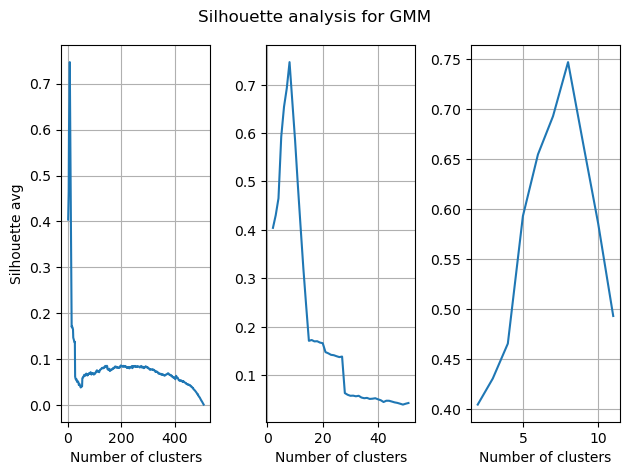

In [107]:
fig, axs = plt.subplots(1, 3)

axs[0].set(ylabel="Silhouette avg")

for ax, scale in zip(axs, [510, 50, 10]):
    ax.plot(num_of_clusters_range[:scale], silhouette_avg[:scale])
    ax.set(xlabel="Number of clusters")
    ax.grid()

fig.suptitle("Silhouette analysis for GMM")
fig.tight_layout()

plt.show()

As we can see, the best number of clusters is **8**, according to silhouette analysis, with a score of:

In [108]:
max(silhouette_avg)

0.7466072847116243

## Checking the results


Let's see what are the results of the clustering

In [109]:
clusters = results[8]
clusters.groupby(["cluster"]).size().reset_index(name="counts")

,cluster,counts
0,0,63
1,1,64
2,2,64
3,3,64
4,4,64
5,5,64
6,6,64
7,7,63


Let's take a look on it in two dimensions

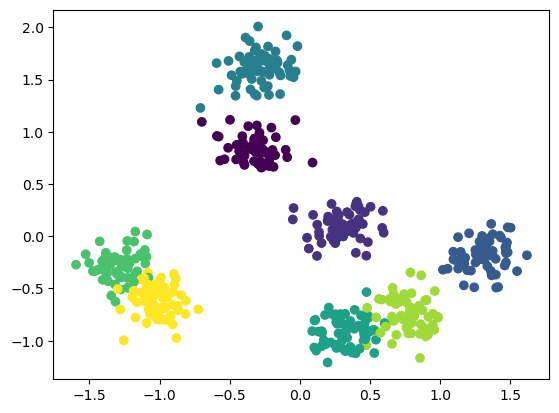

In [111]:
# 0 & 9 dimensions were selected empirically as best for demonstration
colors = clusters.values
plt.scatter(*X[:, (0, 9)].T, c=colors)